In [3]:
# Importación de librerías

# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticas
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway

# Paso 1.

In [4]:
# Carga de datos
df = pd.read_csv('./data/dynamic_pricing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [5]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


## 📊 Descripción de las Variables - Dynamic Pricing Dataset

A continuación, se presenta la descripción de las variables del dataset utilizado para la estrategia de precios dinámicos en una empresa de transporte compartido.

### 📌 Variables del Dataset

| **Variable**                 | **Tipo de Dato** | **Descripción** |
|-----------------------------|---------------|----------------------------------------------------------------|
| `Number_of_Riders`          | `int64`       | Número de pasajeros disponibles en el momento de la reserva. Representa la demanda del servicio en ese instante. |
| `Number_of_Drivers`         | `int64`       | Número de conductores disponibles en el momento de la reserva. Refleja la oferta del servicio. |
| `Location_Category`         | `object`      | Categoría de la ubicación donde se realizó la reserva del viaje. Puede tomar valores como `Urbano`, `Suburbano` o `Rural`. |
| `Customer_Loyalty_Status`   | `object`      | Estado de fidelidad del cliente con la empresa de transporte. Puede incluir categorías como `Regular`, `Silver`, etc., indicando distintos niveles de lealtad o membresía. |
| `Number_of_Past_Rides`      | `int64`       | Cantidad total de viajes anteriores realizados por el cliente. Representa su experiencia y nivel de uso del servicio. |
| `Average_Ratings`           | `float64`     | Calificación promedio otorgada por el cliente en viajes anteriores. Mide la satisfacción del usuario con el servicio. |
| `Time_of_Booking`           | `object`      | Momento del día en que se realizó la reserva, categorizado en franjas como `Mañana`, `Tarde`, `Noche` y `Madrugada`. |
| `Vehicle_Type`              | `object`      | Tipo de vehículo seleccionado para el viaje. Puede incluir opciones como `Económico`, `Premium` u otras categorías según la flota disponible. |
| `Expected_Ride_Duration`    | `int64`       | Duración esperada del viaje en minutos. Es una estimación basada en factores como la distancia y el tráfico. |
| `Historical_Cost_of_Ride`   | `float64`     | Costo histórico de viajes anteriores realizados por el usuario. Permite analizar patrones de precios y gasto del cliente. |

# Paso 2. Desarrollo del Informe de Actividades.
## Análisis exploratorio e inferencial.

### **Análisis Unidimensional.**

#### 1) Realizar una tabla de diccionario de datos que tenga tres columnas: nombre de la variable, descripción de la variable y clasificación en numérica o categórica u otra.

In [6]:
# Se crea de forma manual un diccionario con la descripción de las variables.
data_dict = {
    "Nombre de la Variable": [
        "Number_of_Riders",
        "Number_of_Drivers",
        "Location_Category",
        "Customer_Loyalty_Status",
        "Number_of_Past_Rides",
        "Average_Ratings",
        "Time_of_Booking",
        "Vehicle_Type",
        "Expected_Ride_Duration",
        "Historical_Cost_of_Ride",
    ],
    "Descripción de la Variable": [
        "Número de pasajeros disponibles en el momento de la reserva.",
        "Número de conductores disponibles en el momento de la reserva.",
        "Categoría de la ubicación donde se reservó el viaje (Urbano, Suburbano, Rural).",
        "Estado de fidelidad del cliente con la empresa (Regular, Silver, etc.).",
        "Cantidad total de viajes anteriores realizados por el cliente.",
        "Calificación promedio otorgada por el cliente en viajes anteriores.",
        "Momento del día en que se realizó la reserva (Mañana, Tarde, Noche, Madrugada).",
        "Tipo de vehículo seleccionado para el viaje (Económico, Premium, etc.).",
        "Duración esperada del viaje en minutos.",
        "Costo histórico de viajes anteriores realizados por el usuario.",
    ],
    "Tipo de Variable": [
        "Numérica",
        "Numérica",
        "Categórica",
        "Categórica",
        "Numérica",
        "Numérica",
        "Categórica",
        "Categórica",
        "Numérica",
        "Numérica",
    ],
}

df_dict = pd.DataFrame(data_dict)
df_dict

,Nombre de la Variable,Descripción de la Variable,Tipo de Variable
0,Number_of_Riders,Número de pasajeros disponibles en el momento ...,Numérica
1,Number_of_Drivers,Número de conductores disponibles en el moment...,Numérica
2,Location_Category,Categoría de la ubicación donde se reservó el ...,Categórica
3,Customer_Loyalty_Status,Estado de fidelidad del cliente con la empresa...,Categórica
4,Number_of_Past_Rides,Cantidad total de viajes anteriores realizados...,Numérica
5,Average_Ratings,Calificación promedio otorgada por el cliente ...,Numérica
6,Time_of_Booking,Momento del día en que se realizó la reserva (...,Categórica
7,Vehicle_Type,Tipo de vehículo seleccionado para el viaje (E...,Categórica
8,Expected_Ride_Duration,Duración esperada del viaje en minutos.,Numérica
9,Historical_Cost_of_Ride,Costo histórico de viajes anteriores realizado...,Numérica


#### 2) Realizar las tablas de distribuciones de frecuencias y gráficas de cada una de las variables categóricas, colocando para cada una, su correspondiente interpretación descriptiva.

🔎 **Análisis de la variable 'Location_Category':**
  Location_Category  Frecuencia Absoluta  Frecuencia Relativa (%)
0             Urban                  346                     34.6
1             Rural                  332                     33.2
2          Suburban                  322                     32.2


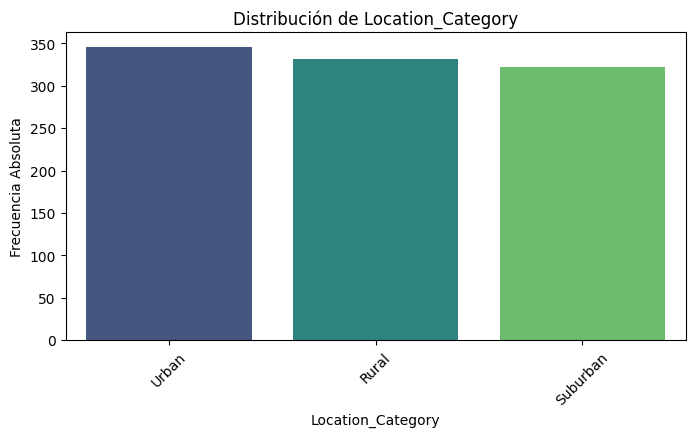

📌 **Interpretación de Location_Category:**
La variable 'Location_Category' presenta una distribución de frecuencias donde la categoría más común es 'Urban' con 346 registros, representando el 34.6% del total.

--------------------------------------------------------------------------------

🔎 **Análisis de la variable 'Customer_Loyalty_Status':**
  Customer_Loyalty_Status  Frecuencia Absoluta  Frecuencia Relativa (%)
0                  Silver                  367                     36.7
1                 Regular                  320                     32.0
2                    Gold                  313                     31.3


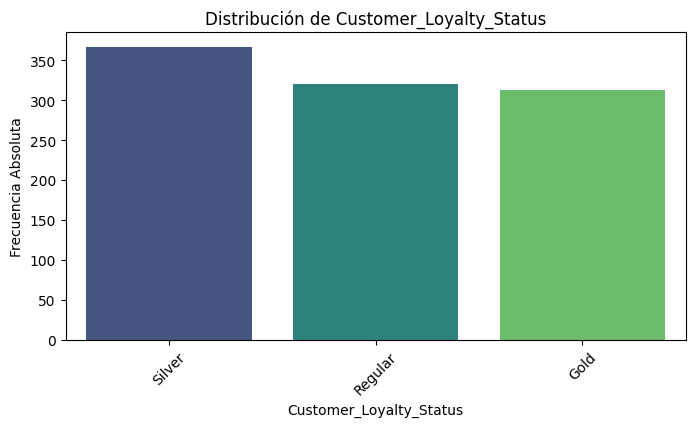

📌 **Interpretación de Customer_Loyalty_Status:**
La variable 'Customer_Loyalty_Status' presenta una distribución de frecuencias donde la categoría más común es 'Silver' con 367 registros, representando el 36.7% del total.

--------------------------------------------------------------------------------

🔎 **Análisis de la variable 'Time_of_Booking':**
  Time_of_Booking  Frecuencia Absoluta  Frecuencia Relativa (%)
0           Night                  276                     27.6
1       Afternoon                  247                     24.7
2         Morning                  246                     24.6
3         Evening                  231                     23.1


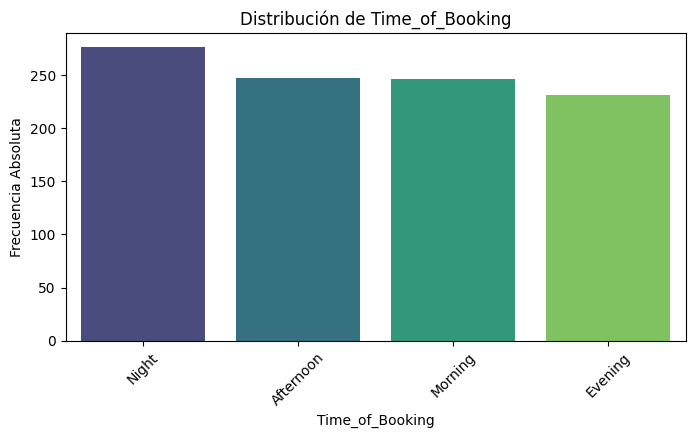

📌 **Interpretación de Time_of_Booking:**
La variable 'Time_of_Booking' presenta una distribución de frecuencias donde la categoría más común es 'Night' con 276 registros, representando el 27.6% del total.

--------------------------------------------------------------------------------

🔎 **Análisis de la variable 'Vehicle_Type':**
  Vehicle_Type  Frecuencia Absoluta  Frecuencia Relativa (%)
0      Premium                  522                     52.2
1      Economy                  478                     47.8


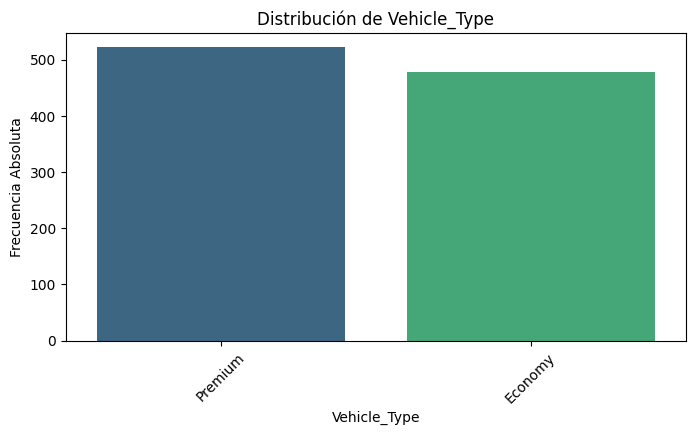

📌 **Interpretación de Vehicle_Type:**
La variable 'Vehicle_Type' presenta una distribución de frecuencias donde la categoría más común es 'Premium' con 522 registros, representando el 52.2% del total.

--------------------------------------------------------------------------------



In [7]:
# Arreglo con las variables categóricas
categorical_vars = [
    "Location_Category",
    "Customer_Loyalty_Status",
    "Time_of_Booking",
    "Vehicle_Type",
]

# Configuracion de la figura
plt.style.use("default")

# Recorrido de las variables categóricas para calcular su distribución de frecuencia y graficarla
for var in categorical_vars:
    print(f"🔎 **Análisis de la variable '{var}':**")
    # Crear tabla de frecuencia
    # Para calcular la frecuencia de cada categoría
    # Se utiliza el método value_counts() para contar la cantidad de registros por cada categoría
    # Se resetea el índice para que la variable categoría se convierta en una columna es decir se convierte la Serie en un DataFrame.
    freq_table = df[var].value_counts().reset_index()
    freq_table.columns = [var, "Frecuencia Absoluta"]
    # Para calcular la frecuencia relativa, se divide la frecuencia absoluta entre el total de registros y se multiplica por 100
    # Se redondea a 3 decimales para que sea más legible
    freq_table["Frecuencia Relativa (%)"] = round((freq_table["Frecuencia Absoluta"] / df.shape[0]) * 100, 3)

    # Mostrar la tabla de frecuencia
    print(freq_table)

    # Generar gráfico de barras
    plt.figure(figsize=(8, 4))
    sns.barplot(data=freq_table, x=var, y="Frecuencia Absoluta", hue=var, palette="viridis", legend=False)
    plt.title(f"Distribución de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia Absoluta")
    plt.xticks(rotation=45)
    plt.show()

    # Interpretación descriptiva
    print(f"📌 **Interpretación de {var}:**")
    print(f"La variable '{var}' presenta una distribución de frecuencias donde la categoría más común es '{freq_table[var][0]}' con {freq_table['Frecuencia Absoluta'][0]} registros, representando el {freq_table['Frecuencia Relativa (%)'][0]}% del total.")
    print("\n" + "-"*80 + "\n")

#### 3) Calcular las medidas de resumen de número de viajeros, calificación, expectativa de duración del viaje y costo histórico del viaje realizar su correspondiente interpretación descriptiva.

In [8]:
# Análisis de las variables Number_of_Riders, Average_Ratings, Expected_Ride_Duration y Historical_Cost_of_Ride
summary_stats = df[["Number_of_Riders", "Average_Ratings", "Expected_Ride_Duration", "Historical_Cost_of_Ride"]].describe().T
# Se redondean los valores a 3 decimales para que sea más legible
summary_stats = summary_stats.round(3)
summary_stats

,count,mean,std,min,25%,50%,75%,max
Number_of_Riders,1000.0,60.372,23.702,20.000,40.000,60.000,81.000,100.000
Average_Ratings,1000.0,4.257,0.436,3.500,3.870,4.270,4.632,5.000
Expected_Ride_Duration,1000.0,99.588,49.165,10.000,59.750,102.000,143.000,180.000
Historical_Cost_of_Ride,1000.0,372.503,187.159,25.993,221.365,362.019,510.498,836.116


##### **Interpretación descriptiva.**

**Número de Viajeros (Number_of_Riders):**

- Promedio: 60.372 pasajeros por reserva.
- Mínimo - Máximo: Oscila entre 20 y 100 pasajeros.
- Desviación estándar: 23.702, indicando variabilidad moderada en la demanda de pasajeros.

**Calificación Promedio (Average_Ratings)**

- Promedio: 4.257, lo que sugiere que la mayoría de los clientes otorgan buenas calificaciones.
- Rango: Entre 3.5 (mínima) y 5.0 (máxima).
- Desviación estándar: 0.436, lo que implica una distribución bastante uniforme sin grandes fluctuaciones.

**Duración Esperada del Viaje (Expected_Ride_Duration):**

- Promedio: 99.588 minutos.
- Rango: Desde 10 minutos (mínimo) hasta 180 minutos (máximo).
- Desviación estándar: 49.165, lo que indica que hay viajes muy cortos y muy largos con gran variabilidad.

**Costo Histórico del Viaje (Historical_Cost_of_Ride):**

- Promedio: $372.503.
- Mínimo - Máximo: $25.993 a $836.116, lo que muestra una gran diferencia de precios.
- Desviación estándar: 187.159, señalando que los precios varían ampliamente según factores como ubicación, lealtad del cliente y tipo de vehículo.


#### 4) Analizar la distribución de las variables del punto 3, mediante un Boxplot o Violín plot, realizar su correspondiente interpretación descriptiva.

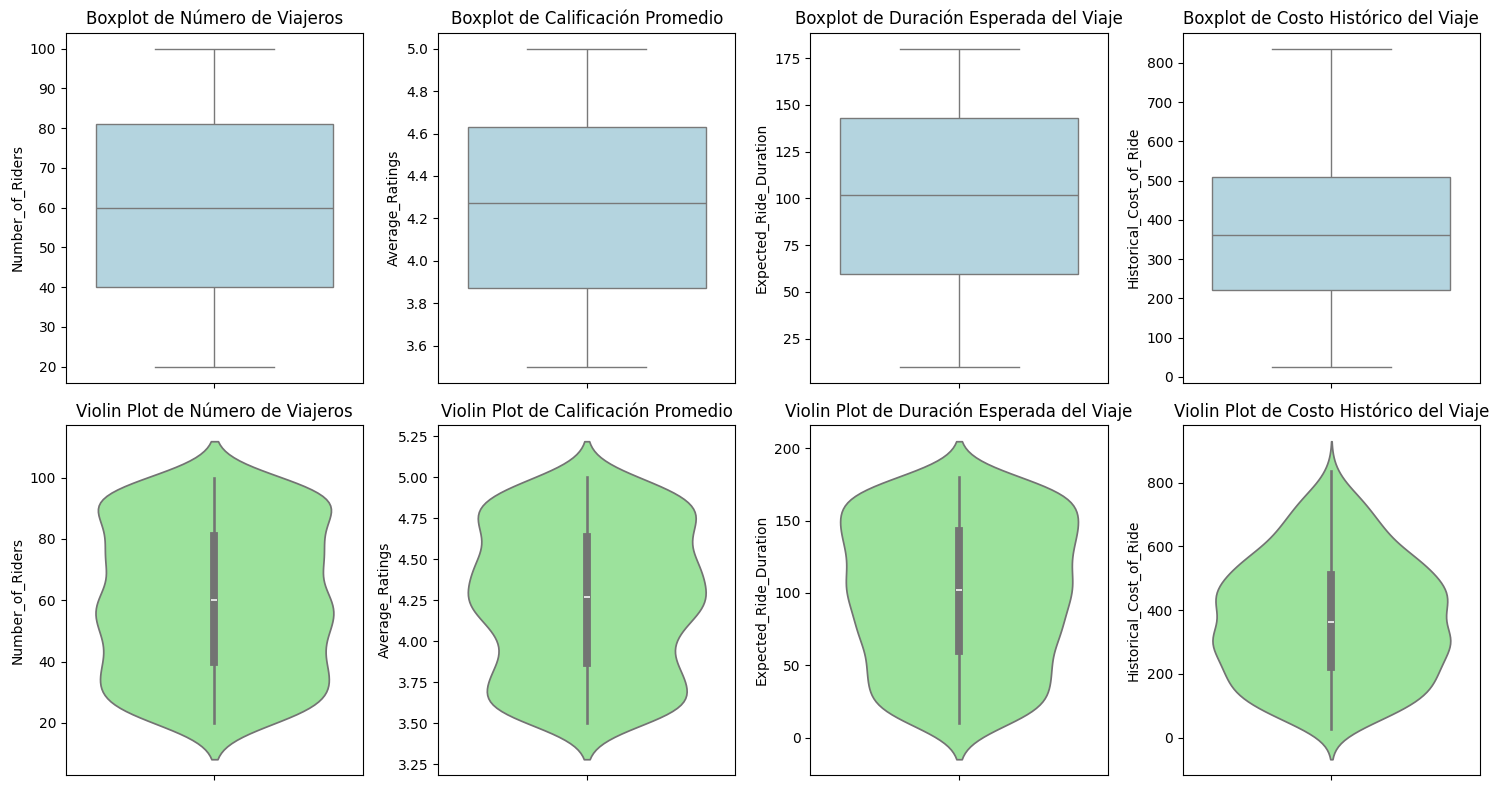

In [17]:
# Variables a graficar y sus respectivos títulos
variables = ["Number_of_Riders", "Average_Ratings", "Expected_Ride_Duration", "Historical_Cost_of_Ride"]
titles = ["Número de Viajeros", "Calificación Promedio", "Duración Esperada del Viaje", "Costo Histórico del Viaje"]

# Crear una figura con 2 filas y 4 columnas
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

# Generar Boxplots (fila superior) y Violin Plots (fila inferior) para cada variable
for i, var in enumerate(variables):
    sns.boxplot(y=df[var], ax=axes[0, i], color="lightblue")
    axes[0, i].set_title(f"Boxplot de {titles[i]}")

    sns.violinplot(y=df[var], ax=axes[1, i], color="lightgreen")
    axes[1, i].set_title(f"Violin Plot de {titles[i]}")

# Ajustar el diseño para que no se solapen los subgráficos
plt.tight_layout()
plt.show()


##### **Interpretación descriptiva.**

**Número de Viajeros (Number_of_Riders):**

- La mayoría de los viajes tienen entre 40 y 80 pasajeros, con una leve dispersión hacia valores más altos. Existen algunos valores atípicos con muy pocos pasajeros (~20).

**Calificación Promedio (Average_Ratings)**

- La mayoría de las calificaciones están entre 4.2 y 4.5, con una distribución casi simétrica. Se observa una ligera variabilidad en valores menores a 4.0, pero sin un sesgo claro.

**Duración Esperada del Viaje (Expected_Ride_Duration):**

- La mayoría de los viajes duran entre 60 y 140 minutos, pero hay una pequeña proporción de viajes más largos (150-180 min), lo que genera valores atípicos en el extremo superior.

**Costo Histórico del Viaje (Historical_Cost_of_Ride):**

- La mayoría de los viajes tienen un costo entre 200 y 500, con una mediana cercana a 350-400. Hay cierta dispersión en los costos más altos, llegando hasta 850, aunque estos son menos frecuentes. La distribución parece moderadamente simétrica, con una ligera tendencia a valores más altos (sesgo derecho leve). No se observan valores atípicos extremos.

### **Análisis Bidimensional e Inferencial**.

#### 5) Analizar la correlación dos a dos entre número de viajeros, calificación, expectativa de duración del viaje contra el costo histórico, siguiendo las indicaciones:

- Realizar los gráficos scatterplot correspondientes (número de viajeros vs costo histórico, calificación vs costo histórico y expectativa de duración del viaje vs costo histórico), describa las posibles correlaciones de acuerdo con las visualizaciones.

- Calcular la correlación de Pearson dos a dos (número de viajeros vs costo histórico, calificación vs costo histórico y expectativa de duración del viaje vs costo histórico) y realizar prueba de correlación para determinar si la correlación entre las variables es fuerte, media o débil e interprete cada uno de los resultados.

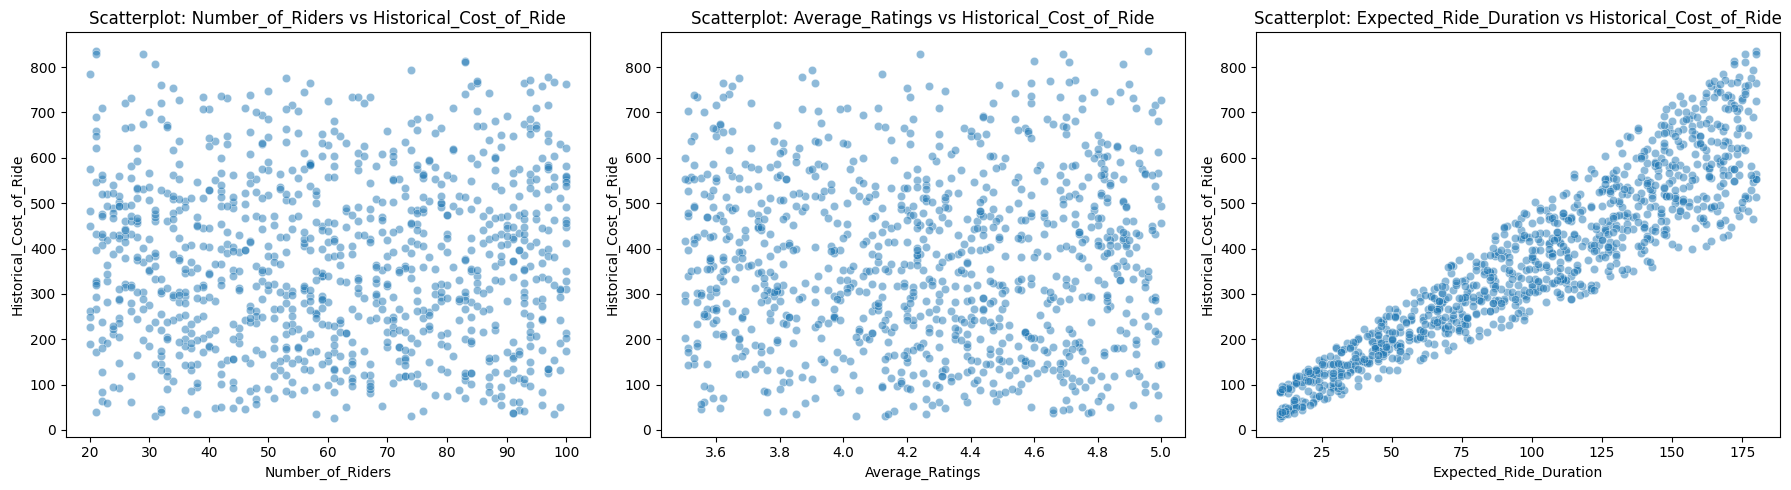

In [25]:
# Variables a analizar
variables_to_compare = ["Number_of_Riders", "Average_Ratings", "Expected_Ride_Duration"]
target_variable = "Historical_Cost_of_Ride"

# Crear scatterplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, var in enumerate(variables_to_compare):
    sns.scatterplot(x=df[var], y=df[target_variable], ax=axes[i], alpha=0.5)
    axes[i].set_title(f"Scatterplot: {var} vs {target_variable}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(target_variable)

plt.tight_layout()
plt.show()

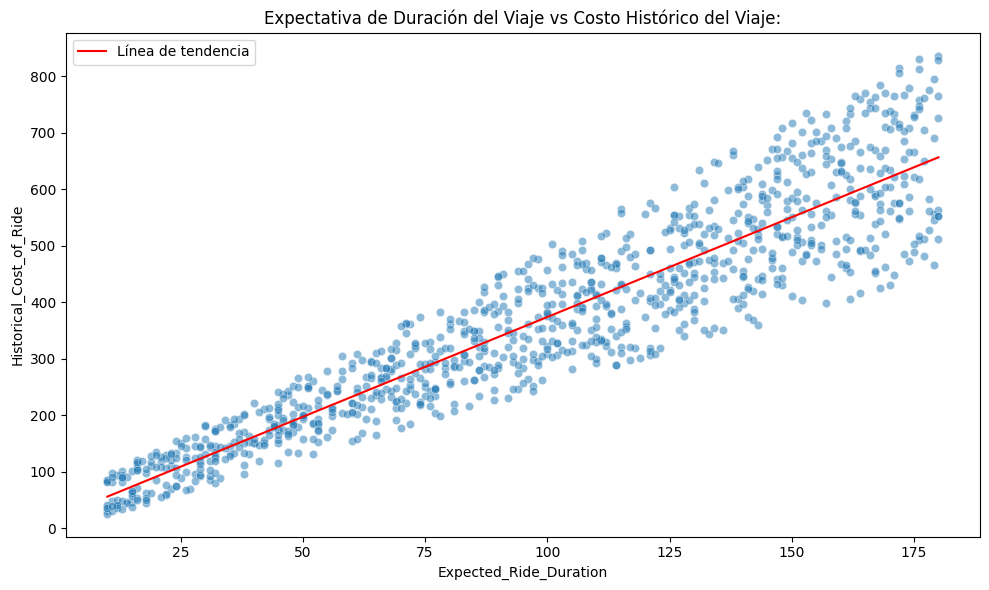

In [28]:
# Variables a analizar
x_variable = "Expected_Ride_Duration"
y_variable = "Historical_Cost_of_Ride"

# Crear scatterplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=df[x_variable], y=df[y_variable], ax=ax, alpha=0.5)

# Calcular la línea de tendencia (regresión lineal)
slope, intercept = np.polyfit(df[x_variable], df[y_variable], 1)
x_vals = np.linspace(df[x_variable].min(), df[x_variable].max(), 100)
y_vals = slope * x_vals + intercept

# Trazar la línea en la gráfica
ax.plot(x_vals, y_vals, color="red", label="Línea de tendencia")

# Configurar la gráfica
ax.set_title(f"Expectativa de Duración del Viaje vs Costo Histórico del Viaje:")
ax.set_xlabel(x_variable)
ax.set_ylabel(y_variable)
ax.legend()

plt.tight_layout()
plt.show()

##### **Análisis visual de las correlaciones**

- **Número de Viajeros vs Costo Histórico del Viaje:** Observando el gráfico, no se aprecia una tendencia clara ni ascendente ni descendente. Los datos se encuentran dispersos en todo el plano de manera uniforme, lo que sugiere que no existe una correlación aparente entre el número de viajeros y el costo histórico del viaje.

- **Calificación promedio vs Costo Histórico del Viaje:** En este caso, tampoco se visualiza una tendencia definida. Los puntos muestran una dispersión considerable sin una relación evidente entre la calificación promedio y el costo histórico del viaje.

- **Expectativa de Duración del Viaje vs Costo Histórico del Viaje:** Aquí se observa claramente una fuerte tendencia positiva. Los puntos muestran un comportamiento lineal ascendente, indicando que, a mayor expectativa de duración del viaje, mayor es el costo histórico del viaje.


In [11]:
# Calcular la correlación de Pearson y realizar prueba de significancia
correlation_results = {}

for var in variables_to_compare:
    corr_coeff, p_value = stats.pearsonr(df[var], df[target_variable])
    correlation_results[var] = {"Correlación": corr_coeff, "p-valor": p_value}

# Convertir los resultados en un DataFrame y mostrar
correlation_df = pd.DataFrame(correlation_results).T
correlation_df

,Correlación,p-valor
Number_of_Riders,0.005826,0.854017
Average_Ratings,-0.001063,0.973209
Expected_Ride_Duration,0.927547,0.000000


##### **Correlación de Pearson e Interpretación**

- Número de Viajeros vs Costo Histórico: La fuerza de correlación es débil. No existe relación significativa estadística entre estas variables, ya que el valor p es alto (> 0.05) y la correlación muy baja.
- Calificación vs Costo Histórico: La fuerza de correlación es débil. No existe relación significativa estadística entre estas variables, dado el alto valor p (> 0.05) y la correlación muy cercana a cero.

- Expectativa Duración vs Costo Histórico: La fuerza de correlación es fuerte. Existe una correlación positiva fuerte y estadísticamente significativa (p < 0.05), indicando que la duración esperada del viaje tiene un efecto directo sobre el costo histórico del viaje.

#### 6) Analizar las asociaciones estado de fidelidad del cliente, reservación y tipo de  vehículo, siguiendo las indicaciones:

- Realiza una tabla de contingencia para cada una de las asociaciones  (deben salir tres tablas), coloque observaciones relevantes frente a las  posibles relaciones que encuentre entre categorías.

- Realice pruebas Chi – Cuadrado para cada una de las tablas de  contingencia, puede hacerlo en paralelo e interprete los resultados, determinando que la existencia o no de asociación entre las variables.

In [30]:
# Variables categóricas
variables_pairs = [
    ("Customer_Loyalty_Status", "Time_of_Booking"),
    ("Customer_Loyalty_Status", "Vehicle_Type"),
    ("Time_of_Booking", "Vehicle_Type")
]

# Crear y mostrar las tablas de contingencia + prueba Chi-Cuadrado
for var1, var2 in variables_pairs:
    # print("\n")
    print(f"Tabla de contingencia: {var1} vs {var2}")
    print("-"*70)
    contingency_table = pd.crosstab(df[var1], df[var2])
    print(contingency_table)
 

    # Prueba Chi-Cuadrado
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    # print(f"\nResultados Chi-Cuadrado:")
    print(f"Chi2 = {chi2:.4f}")
    print(f"p-valor = {p:.4f}")
    print("-"*70)

Tabla de contingencia: Customer_Loyalty_Status vs Time_of_Booking
----------------------------------------------------------------------
Time_of_Booking          Afternoon  Evening  Morning  Night
Customer_Loyalty_Status                                    
Gold                            68       76       79     90
Regular                         89       74       79     78
Silver                          90       81       88    108
Chi2 = 4.6504
p-valor = 0.5894
----------------------------------------------------------------------
Tabla de contingencia: Customer_Loyalty_Status vs Vehicle_Type
----------------------------------------------------------------------
Vehicle_Type             Economy  Premium
Customer_Loyalty_Status                  
Gold                         153      160
Regular                      144      176
Silver                       181      186
Chi2 = 1.4916
p-valor = 0.4744
----------------------------------------------------------------------
Tabla de contin

##### **Interpretación de Tablas de Contingencia y Pruebas Chi-cuadrado**
- **Estado de Fidelidad del Cliente vs Tipo de Vehículo (Customer Loyalty Status vs Time of Booking):** El p-valor obtenido es 0.5894, mayor a 0.05, lo que indica que no hay suficiente evidencia estadística para afirmar que exista una asociación significativa entre el estado de fidelidad del cliente y el momento del día en que se realiza la reservación. Esto implica que los clientes, independientemente de su estado de fidelidad, reservan en diferentes momentos del día sin patrones definidos.

- **Estado de Fidelidad del Cliente vs Momento de Reservación (Customer Loyalty Status vs Time of Booking):** El p-valor obtenido es 0.4744, mayor a 0.05, indicando que tampoco hay evidencia suficiente para afirmar la existencia de una relación significativa entre el estado de fidelidad del cliente y el tipo de vehículo elegido (Economy o Premium). Esto indica que la elección del vehículo por parte del cliente no parece estar relacionada con su estado de fidelidad.

- **Momento de la Reservación vs Tipo de Vehículo (Time of Booking vs Vehicle Type):** El p-valor obtenido es 0.3206, mayor a 0.05, indicando que no existe una asociación estadísticamente significativa entre el momento del día en que se hace la reservación y el tipo de vehículo seleccionado. Es decir, no hay evidencia que sugiera una preferencia específica por vehículo según el momento del día en que se realiza la reserva.


El análisis inferencial (prueba Chi-cuadrado) indica que no existe una asociación estadísticamente significativa entre estas variables categóricas. Los clientes parecen comportarse de manera independiente en relación con su fidelidad, el momento del día en que hacen sus reservaciones, y el tipo de vehículo que eligen.

#### **7) Analizar la relación entre número de viajeros, calificación y expectativa de  duración del viaje, siguiendo las indicaciones:**
- Diseñe gráficos de boxplot o violín plot para analizar si se detectan  diferencias en las distribuciones de viajeros, calificación y expectativa de  duración del viaje según la fidelidad del cliente. (Debe obtener tres  gráficas).

- Realice una prueba ANOVA de una sola vía, que compruebe la igualdad o  diferencia de medias, interprete la significancia estadística y si encuentra  diferencias significativas con algún grupo, implementa una prueba Post  Hoc, que permita determinar si la fidelidad del cliente influye en la  cantidad de viajeros, su calificación y expectativa del viaje. (Debe  obtener tres pruebas).

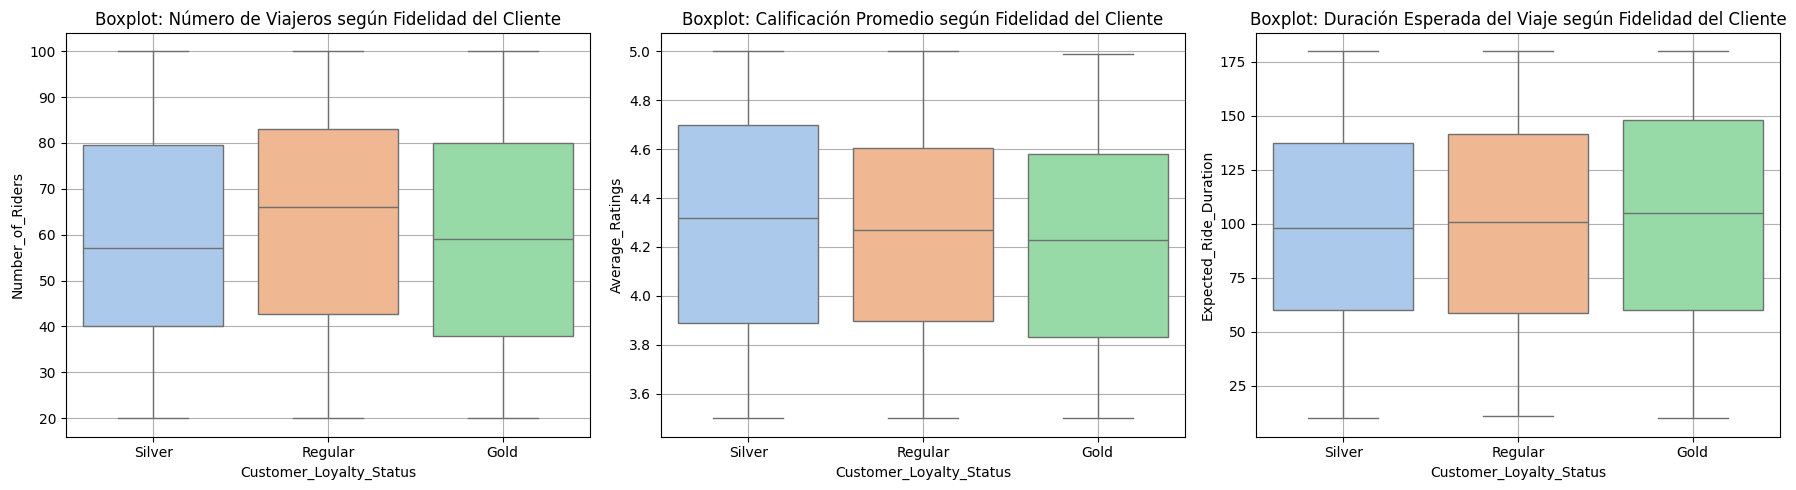

In [13]:
# Variables a analizar
variables = ["Number_of_Riders", "Average_Ratings", "Expected_Ride_Duration"]
titles = ["Número de Viajeros", "Calificación Promedio", "Duración Esperada del Viaje"]
categorical_var = 'Customer_Loyalty_Status'

# Crear boxplots
plt.figure(figsize=(18, 5))

for i, var in enumerate(variables):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=categorical_var, y=var, data=df, hue=categorical_var, palette="pastel")
    plt.title(f"Boxplot: {titles[i]} según Fidelidad del Cliente")
    plt.grid(True)

plt.tight_layout()
plt.show()


In [14]:
# Crear función para ANOVA y Post Hoc
def anova_and_posthoc(var):
    print(f"\n🔍 Análisis ANOVA para {var}")

    # Separar los grupos
    groups = [df[df["Customer_Loyalty_Status"] == status][var] for status in df["Customer_Loyalty_Status"].unique()]

    # Prueba ANOVA
    F, p = f_oneway(*groups)
    print(f"F = {F:.4f}, p-valor = {p:.4f}")

    if p < 0.05:
        print("✅ Hay diferencia significativa entre los grupos. Realizando prueba Post Hoc...")
        # Prueba Post Hoc Tukey
        tukey = pairwise_tukeyhsd(endog=df[var], groups=df["Customer_Loyalty_Status"], alpha=0.05)
        print(tukey)
    else:
        print("❌ No hay diferencia significativa entre los grupos.")

# Aplicar para cada variable
for var in variables:
    anova_and_posthoc(var)


🔍 Análisis ANOVA para Number_of_Riders
F = 2.3835, p-valor = 0.0928
❌ No hay diferencia significativa entre los grupos.

🔍 Análisis ANOVA para Average_Ratings
F = 2.3143, p-valor = 0.0994
❌ No hay diferencia significativa entre los grupos.

🔍 Análisis ANOVA para Expected_Ride_Duration
F = 0.8281, p-valor = 0.4372
❌ No hay diferencia significativa entre los grupos.


##### **Interpretación**
- **Número de Viajeros según Estado de Fidelidad del Cliente (Number of Riders vs Customer Loyalty Status):**
    - Gráfico boxplot: Se observa una ligera variación entre grupos, pero no parecen existir grandes diferencias visuales claras entre los estados de fidelidad (Gold, Regular, Silver).
    - Resultados ANOVA:
        - Valor F: 2.3835
        - p-valor: 0.0928 (mayor que 0.05)

    No existe una diferencia estadísticamente significativa entre las medias del número de viajeros según el estado de fidelidad del cliente, pues el valor p obtenido es superior a 0.05. Por lo tanto, no es necesario realizar una prueba Post Hoc.

- **Calificación Promedio según Estado de Fidelidad del Cliente (Average Ratings vs Customer Loyalty Status):**
    - Gráfico boxplot: Se observa poca variación visual entre los grupos Gold, Regular y Silver, indicando que las calificaciones son bastante homogéneas.
    - Resultados ANOVA:
        - Valor F: 2.3143
        - p-valor: 0.0994 (mayor que 0.05)

    No existe una diferencia estadísticamente significativa en las calificaciones promedio según el estado de fidelidad del cliente, pues el p-valor supera el umbral de significancia (0.05). No se requiere prueba Post Hoc.

- **Expectativa de Duración del Viaje según Estado de Fidelidad del Cliente (Expected Ride Duration vs Customer Loyalty Status):**
    - Gráfico boxplot: No se observan diferencias claras o importantes visualmente entre los estados de fidelidad en cuanto a la expectativa de duración del viaje. Los grupos parecen tener distribuciones similares.
    - Resultados ANOVA:
        - Valor F: 0.8281
        - p-valor: 0.4372 (mayor que 0.05)

    El análisis estadístico indica claramente que no existe una diferencia significativa en la duración esperada del viaje según el estado de fidelidad del cliente, pues el valor p es considerablemente alto, lo que implica que tampoco se requiere prueba Post Hoc.


No fue necesario realizar prueba Post Hoc (como Tukey), porque en ningún caso se encontró diferencia significativa en el ANOVA.

La fidelidad del cliente no influye significativamente sobre el número de viajeros, la calificación promedio, ni sobre la expectativa de duración del viaje, según el análisis estadístico realizado. Las distribuciones y medias de estos atributos son consistentes independientemente del nivel de fidelidad (Gold, Regular, Silver).